In [1]:
%matplotlib inline
import os
os.environ['THEANO_FLAGS'] = 'device=gpu'
import numpy as np
import sys
sys.path.append('..')
from tools.common import load_model
import theano
import theano.tensor as T
from machinedesign.autoencoder.interface import iterative_refinement
from machinedesign.viz import grid_of_images_default
from skimage.io import imsave
from IPython.display import Image

Using gpu device 0: Tesla K20Xm (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 5005)
/home/mcherti/miniconda/envs/databoard-env/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using Theano backend.


In [2]:
model, layers, data = load_model('../jobs/results/1b5f929796b52352a009ab37f602bfbf/model.pkl')

/home/mcherti/miniconda/envs/databoard-env/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


(None, 1, 28, 28)
Loading data...


INFO:tasks:Loading data...


(None, 1, 28, 28)
(None, 1, 28, 28)
Loading the model...


INFO:tasks:Loading the model...


(None, 1, 28, 28)
Compiling the model...


INFO:tasks:Compiling the model...


In [3]:
model.predict = model.reconstruct

In [4]:
model.transformers = []
model.input_shape = (None, 1, 28, 28)

In [5]:
params = {
    'batch_size': 64,
    'nb_samples': 900,
    'nb_iter': 100,
    'binarize':{
        'name': 'binary_threshold',
        'params': {
            'is_moving': True,
            'one_ratio': 0.13
        }
    },
    'noise':{
        'name': 'none',
        'params': {
        }
    },
    'stop_if_unchanged': False,
    'seed': 42,
}

In [6]:
x = iterative_refinement(params, model)

/home/mcherti/miniconda/envs/databoard-env/lib/python2.7/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


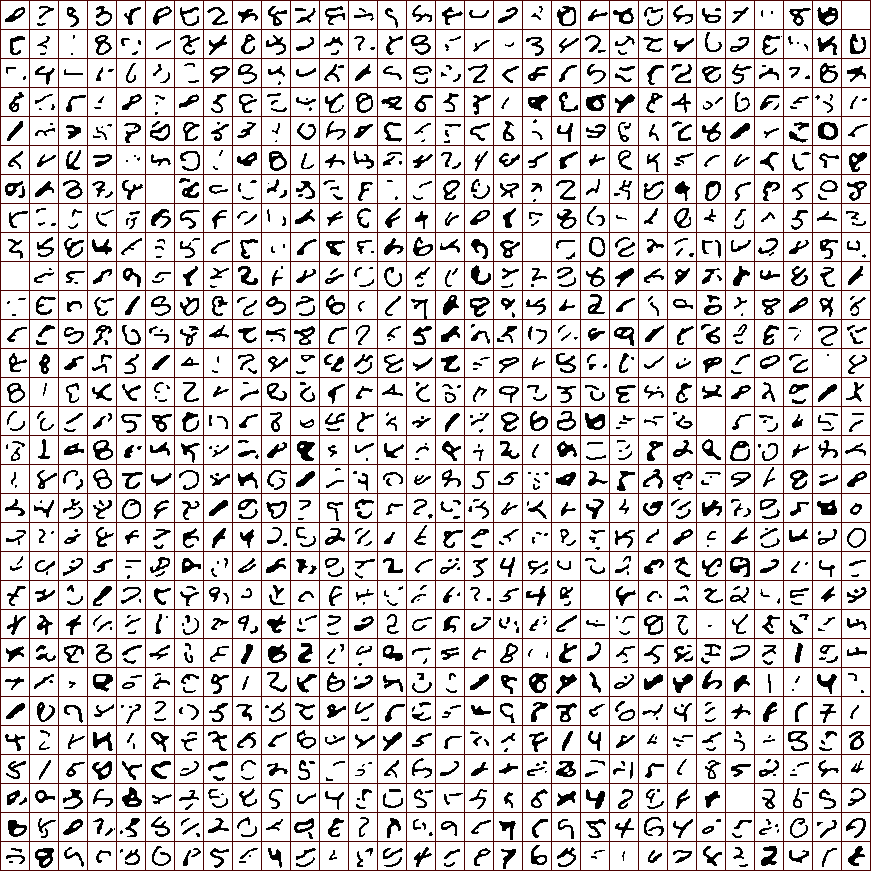

In [7]:
img = grid_of_images_default(1-x[:,-1])
imsave('out.png', img)
Image('out.png')